In [2]:
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import Counter
from PIL import Image
from PIL import ImageFilter
from PIL import ImageDraw


from bokeh.plotting import figure, ColumnDataSource, output_file, show
from bokeh.io import output_notebook, show
from bokeh.models import HoverTool
from sklearn.preprocessing import StandardScaler
import json
import os
import glob
import datetime as dt
from MulticoreTSNE import MulticoreTSNE as TSNE
now = dt.datetime.now
output_notebook()
%load_ext autoreload
%autoreload 2

Loading BokehJS ...

In [3]:
from mmm import get_datas, count_probs, get_list, get_data, get_stocks_type, count_logs, count_logs_fixed, get_last_n, get_stats


In [10]:
d = next(get_datas())

In [7]:
22*9 

198

In [ ]:
print(d[0])

In [30]:
data = {}
max_len = 0
i = 0
for se in get_datas():
    if i %100 == 0:
        print(i)
    i+=1
    data[se[0]]=se[1][-195:]
    max_len = max(len(data[se[0]]), max_len)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000


In [31]:
max_len

195

In [32]:
import pickle

In [6]:
type(data['REDU']) == np.ndarray

False

In [33]:
raw_data = data

In [34]:
data = {}

In [35]:
import json

In [37]:
json.dump(raw_data, open('raw_data.json', 'w'))

In [41]:
raw_data['RWGE=']

[{'date': '2017-12-01',
  'open': 10,
  'high': 10.01,
  'low': 10,
  'close': 10,
  'volume': 8919732,
  'unadjustedVolume': 8919732,
  'change': 10,
  'changePercent': 0,
  'vwap': 10.0012,
  'label': 'Dec 1, 17',
  'changeOverTime': 0},
 {'date': '2017-12-04',
  'open': 10.0001,
  'high': 10.01,
  'low': 10,
  'close': 10,
  'volume': 121089,
  'unadjustedVolume': 121089,
  'change': 0,
  'changePercent': 0,
  'vwap': 10.0001,
  'label': 'Dec 4, 17',
  'changeOverTime': 0},
 {'date': '2017-12-05',
  'open': 10,
  'high': 10.01,
  'low': 10,
  'close': 10.004,
  'volume': 160584,
  'unadjustedVolume': 160584,
  'change': 0.004,
  'changePercent': 0.04,
  'vwap': 10.0003,
  'label': 'Dec 5, 17',
  'changeOverTime': 0.00039999999999995595},
 {'date': '2017-12-06',
  'open': 10,
  'high': 10.0025,
  'low': 10,
  'close': 10,
  'volume': 510261,
  'unadjustedVolume': 510261,
  'change': -0.004,
  'changePercent': -0.04,
  'vwap': 10,
  'label': 'Dec 6, 17',
  'changeOverTime': 0},
 {'dat

In [53]:
for l in raw_data['BABA']:
    print('open' in l)
    break;

True


In [76]:
newLen=max_len *7
data = {}
i = 0
for key in raw_data.keys():
    if i %100 == 1:
        print(i)
        #break;
    i+=1
    ar = np.array([])
    #max_iter = 100
    for r in raw_data[key]:
        try:
            if 'open' in r:
                ar = np.append(ar, [r['open'], r['high'], r['low'], r['close']])
                               #r['volume'], r['unadjustedVolume'],r['change'],
                               #r['changePercent']])
            
        except Exception as ex:
            print(key)
            print(ex)
            break;
    if len(ar) < newLen:
        data[key] = np.append(ar, [ar.mean()]*(newLen - len(ar)))
    else:
        data[key] = ar

1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001


In [72]:
data['BABA']

array([171.59, 172.9 , 170.8 , ...,   0.  ,   0.  ,   0.  ])

In [ ]:
a = np.array([np.array(Image.open(path[1]).getdata()).reshape(28566)/255 for path in charts])
print(a.shape)
%time scalar = StandardScaler()
print(now(), 'create scalar')
%time scalar.fit(a)
print(now(), 'created scalar')
%time norm = scalar.transform(a)
print(now(), 'transformed')
plt.plot(norm[1])
np.save('charts_small_'+str(len(a)), a)

In [82]:
np.flip(np.array([1,2,4]), axis=0)

array([4, 2, 1])

(6054, 1365)
CPU times: user 17 µs, sys: 13 µs, total: 30 µs
Wall time: 33.9 µs
2018-10-04 20:59:37.338988 create scalar
CPU times: user 203 ms, sys: 50.6 ms, total: 253 ms
Wall time: 135 ms
2018-10-04 20:59:37.475295 created scalar
CPU times: user 370 ms, sys: 20.5 ms, total: 391 ms
Wall time: 65.6 ms
2018-10-04 20:59:37.541640 transformed


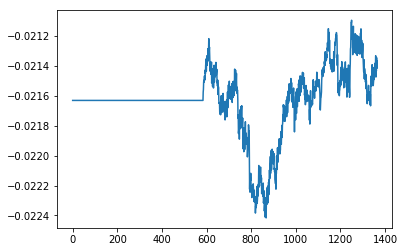

In [84]:
a = np.array([np.flip(data[key], axis=0) for key in data.keys()])
print(a.shape)
%time scalar = StandardScaler()
print(now(), 'create scalar')
%time scalar.fit(a)
print(now(), 'created scalar')
%time norm = scalar.transform(a)
print(now(), 'transformed')
plt.plot(norm[100])
np.save('charts_small_'+str(len(a)), a)

In [93]:
# pdrate[['over 1%', 'over 2%', 'over 3%','over 4%','over 5%','rate001', 'rate002', 'rate003','rate004','rate005',"year5CP", "year2CP", "year1CP", "ytdCP", "month6CP", "month3CP", "month1CP", "day5CP", "day30CP"]]
tsne = TSNE(perplexity=1000, n_jobs=16,verbose=10)
%time y = tsne.fit_transform(a)

CPU times: user 5min 40s, sys: 4.27 s, total: 5min 45s
Wall time: 5min 54s


In [ ]:
PCA()

In [94]:
TOOLTIPS = """
<div style="position: relative;">
<img
                src="https://finviz.com/chart.ashx?t=@symbol&s=m&ty=c&ta=1"
                style="float: left; margin: 0px 15px 15px 0px; max-width:200px"
                border="2"
            ></img>
             <div>@symbol</div>
  </div>
  
"""

scatter = figure( plot_width=1000, plot_height=800,  title="Mouse over the dots")#, tools=['hover', 'zoom'])
hover = HoverTool()
hover.tooltips = TOOLTIPS
scatter.tools.append(hover)

source = ColumnDataSource(data=dict(x=y[:,0],y=y[:,1],symbol=[c for c in list(data.keys())],idx=list(range(0,len(y)))))
scatter.circle('x', 'y', size=7, source = source, fill_alpha=0.4)
show(scatter)

In [96]:
from sklearn.decomposition import PCA

In [97]:
data_2 = PCA(n_components=2).fit_transform(a)


In [100]:
a

array([[14.36487179, 14.36487179, 14.36487179, ..., 12.31      ,
        12.79      , 12.79      ],
       [13.71583564, 13.71583564, 13.71583564, ..., 13.34      ,
        14.11      , 13.42      ],
       [10.29117859, 10.29117859, 10.29117859, ...,  4.1       ,
         4.27      ,  4.2       ],
       ...,
       [35.15211641, 35.15211641, 35.15211641, ..., 36.8601    ,
        37.3904    , 36.9485    ],
       [ 2.81821795,  2.81821795,  2.81821795, ...,  2.9       ,
         3.05      ,  2.9       ],
       [56.24614359, 56.24614359, 56.24614359, ..., 58.8272    ,
        59.8165    , 59.5618    ]])

In [98]:
data_2

array([[-2711.0502298 ,    50.35265894],
       [-2734.88863964,    44.9846367 ],
       [-2862.19052948,    31.84422448],
       ...,
       [-1942.1891566 ,     3.16109772],
       [-3136.66728703,    22.11027534],
       [-1162.28098185,    53.53690707]])

In [99]:
TOOLTIPS = """
<div style="position: relative;">
<img
                src="https://finviz.com/chart.ashx?t=@symbol&s=m&ty=c&ta=1"
                style="float: left; margin: 0px 15px 15px 0px; max-width:200px"
                border="2"
            ></img>
             <div>@symbol</div>
  </div>
  
"""

scatter = figure( plot_width=1000, plot_height=800,  title="Mouse over the dots")#, tools=['hover', 'zoom'])
hover = HoverTool()
hover.tooltips = TOOLTIPS
scatter.tools.append(hover)

source = ColumnDataSource(data=dict(x=data_2[:,0],y=data_2[:,1],symbol=[c for c in list(data.keys())],idx=list(range(0,len(y)))))
scatter.circle('x', 'y', size=7, source = source, fill_alpha=0.4)
show(scatter)